# Data Information:

## Input variables:


## Output variable (desired target):


# Data preprocessing 

Import libraries and data, select a small sample set for trainning


In [73]:
from sklearn import datasets
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

lol_origin = pd.read_csv('./leagueoflegends/leagueoflegends.csv')
lol = lol_origin.copy()
lol.tail()

,bu,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...",...,Veigar,"[500, 500, 632, 982, 1258, 1667, 2060, 2390, 2...",Zeitnot,Xayah,"[500, 500, 564, 1027, 1320, 1727, 1963, 2276, ...",SnowFlower,Rakan,"[500, 500, 566, 801, 1004, 1234, 1463, 1674, 1...","['Ornn', 'Kalista', 'Ryze', 'Alistar', 'Shen']",https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -...",...,Ryze,"[500, 500, 612, 1000, 1193, 1626, 1979, 2318, ...",Ruvelius,Caitlyn,"[500, 500, 621, 977, 1420, 1809, 2047, 2413, 2...",Japone,Braum,"[500, 500, 587, 790, 1107, 1335, 1472, 1616, 1...","['Zoe', 'KogMaw', 'JarvanIV', 'Ornn', 'Rengar']",https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,"[0, -8, -6, 116, 103, -92, -470, -958, -1998, ...",...,Malzahar,"[500, 500, 615, 903, 1225, 1617, 1976, 2304, 2...",k1ng,Ezreal,"[500, 508, 592, 986, 1400, 1753, 2196, 2538, 3...",Cupcake,Taric,"[500, 500, 585, 770, 976, 1222, 1446, 1627, 19...","['Azir', 'Kalista', 'Braum', 'Maokai', 'Alistar']",https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...",...,Veigar,"[500, 500, 561, 931, 1223, 1631, 1987, 2315, 2...",Low,Sivir,"[500, 500, 634, 930, 1304, 1691, 2042, 2384, 2...",Tilting,Janna,"[500, 500, 592, 788, 1006, 1251, 1490, 1704, 1...","['Kalista', 'Galio', 'Gnar', 'Jayce', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...
7619,OPL,2018,Spring,Season,TTC,0,1,LGC,42,"[0, 0, -8, -225, -36, 73, 464, 184, 1171, 1409...",...,Malzahar,"[500, 500, 598, 968, 1165, 1477, 1801, 2016, 2...",Raid,Vayne,"[500, 500, 587, 954, 1327, 1749, 2007, 2471, 2...",Decoy,Braum,"[500, 500, 585, 793, 998, 1201, 1373, 1619, 18...","['KogMaw', 'Illaoi', 'Azir', 'Karma', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...


In [74]:
#lol = lol_origin.drop(['goldblue','goldred','Address','bBarons','rBarons','redBans','blueBans',],1) 
#this is the way we treat 'player' as nominal variables

lol = lol_origin.drop(['golddiff','goldblue','goldred','Address','bBarons','rBarons','redBans','blueBans','blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport','gamelength'],1) 
# this is the way we treat 'player' as ordinal variables, therefore, we set them as dummies later

for x in ['goldblueTop','goldblueJungle','goldblueMiddle','goldblueADC','goldblueSupport',
          'goldredTop','goldredJungle','goldredMiddle','goldredADC','goldredSupport']:
    lol[x] = [int(y.split(',')[14]) for y in lol_origin[x]]

for x in ['Top','Jungle','Middle','ADC','Support']:
    lol['golddiff' + x ] = lol['goldblue' + x ] - lol['goldred' + x ]
    del lol['goldblue' + x ]
    del lol['goldred' + x ]

In [75]:
def get_data15(feature):
    info = [x[2:-2] for x in feature]
    data15 = []
    for y in info:
        y = y.split('], [')
        j = 0
        for z in y:
            if z.strip() =='':
                break
            else:
                z=z.split(',')
                n =float(z[0])
                if n < 15.0 :
                    j = j + 1
        data15.append(j)
    return data15

In [76]:
for x in ['bKills','bTowers','bInhibs','bDragons','bHeralds',
          'rKills','rTowers','rInhibs','rDragons','rHeralds']:
    del lol[x]
    lol[x] = get_data15(lol_origin[x])

In [77]:
champ_names = lol_origin['blueTopChamp']
player_names = lol_origin['blueTop']
team_names = lol_origin['blueTeamTag']
for x in ['blueMiddleChamp','blueJungleChamp','blueADCChamp','blueSupportChamp',
          'redTopChamp','redMiddleChamp','redJungleChamp','redADCChamp','redSupportChamp']:
    champ_names = champ_names.append(lol_origin[x])
for x in ['blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']:
    player_names = player_names.append(lol_origin[x])
team_names = team_names.append(lol_origin['redTeamTag'])

### Processing the ordinal and nominal data,seperately

In [78]:
from sklearn.preprocessing import LabelEncoder

def nominal_transform(names,sets):
    le = LabelEncoder()
    le.fit_transform(names.astype(str))
    for x in sets:
        lol[x] = le.transform(lol_origin[x].astype(str))

In [79]:
Position = ['blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']
Champ = [x+'Champ' for x in Position]
Team = ['blueTeamTag','redTeamTag']
Other = ['bu','Season','Type']

nominal_transform(champ_names,Champ)
#nominal_transform(player_names,Position)   #this is the way we treat 'player' as nominal variables
nominal_transform(team_names,Team)

for x in Other:
    le = LabelEncoder()
    lol[x] = le.fit_transform(lol_origin[x].astype(str))

In [80]:
dummies_Player = pd.get_dummies(lol_origin[['blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']])
# transform players' names into dummies

In [81]:
Champ_list = sorted(champ_names.unique())
lol_origin.redBans = lol_origin.redBans.str.strip('[]').str.replace("'",'')
lol_origin.blueBans = lol_origin.blueBans.str.strip('[]').str.replace("'",'')
dummies_Champ_Bans = pd.DataFrame(np.zeros((len(lol_origin),len(Champ_list))),columns=Champ_list)
for i, Champ in enumerate(lol_origin.redBans):
    Champ = str(Champ)
    for ban in Champ.split(', '):
        dummies_Champ_Bans.ix[i, ban] = 1
for i, Champ in enumerate(lol_origin.blueBans):
    Champ = str(Champ)
    for ban in Champ.split(', '):
        dummies_Champ_Bans.ix[i, ban] = 1
del dummies_Champ_Bans['']
lol = lol.join(dummies_Champ_Bans)
lol = lol.join(dummies_Player) # treat players as ordinal variables
#lol.to_excel('lol_players_nominal.xlsx')   # export nominal_player data into excel, ordinal data is too big to export.


D:\python3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [82]:
y = lol['bResult']
X = lol.drop(['bResult','rResult'],1)

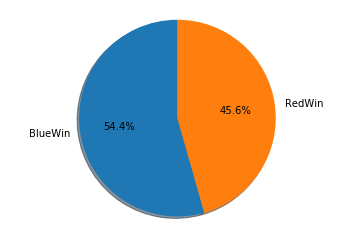

In [83]:
labels = 'BlueWin', 'RedWin'
sizes = [y.value_counts()[1],y.value_counts()[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Splitting data into 70% training and 30% test data

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### Bringing features onto the same scale(Standardization)

In [85]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# Feature Selection

## PCA Selection

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([  3.39820015e-03,   3.09694271e-03,   2.99061520e-03, ...,
         2.85366143e-38,   1.32559445e-39,   9.08959234e-40])

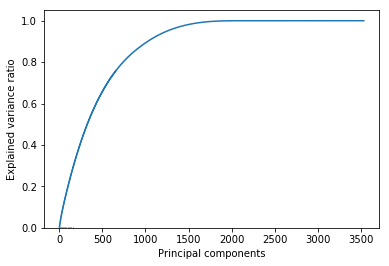

In [87]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [108]:
pca = PCA(n_components=1500)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [109]:
lr = LogisticRegression(penalty='l1',C=0.03,random_state=1)
lr = lr.fit(X_train_pca, y_train)
print('accuracy of trainning = ' ,lr.score(X_train_pca,y_train))
print('accuracy of testing = ' ,lr.score(X_test_pca,y_test))

accuracy of trainning =  0.807836520435
accuracy of testing =  0.731846019248


## Random Forest Selection

 1) golddiffMiddle                 0.049232
 2) golddiffADC                    0.044670
 3) golddiffTop                    0.042095
 4) golddiffJungle                 0.040907
 5) golddiffSupport                0.040879
 6) bKills                         0.029636
 7) rDragons                       0.029326
 8) rKills                         0.028529
 9) bDragons                       0.020325
10) rTowers                        0.018053
11) bTowers                        0.016279
12) redTeamTag                     0.005852
13) blueTopChamp                   0.005294
14) redMiddleChamp                 0.005166
15) blueMiddleChamp                0.005092
16) redTopChamp                    0.004989
17) blueTeamTag                    0.004938
18) blueJungleChamp                0.004836
19) redJungleChamp                 0.004716
20) blueSupportChamp               0.004587
21) redADCChamp                    0.004551
22) redSupportChamp                0.004161
23) blueADCChamp                

1382) blueMiddle_xPeke               0.000132
1383) blueTop_957                    0.000132
1384) blueMiddle_FeniX               0.000132
1385) redJungle_Turtle               0.000131
1386) redSupport_Raxxo               0.000131
1387) blueJungle_Rawbin              0.000131
1388) blueJungle_H0R0                0.000131
1389) redSupport_Yellowstar          0.000131
1390) redSupport_Zest                0.000131
1391) redSupport_Visdom              0.000131
1392) blueMiddle_Lavie               0.000131
1393) redTop_Brolia                  0.000130
1394) redADC_otter                   0.000130
1395) redADC_mean                    0.000130
1396) blueSupport_Meiko              0.000130
1397) Shyvana                        0.000130
1398) blueMiddle_Cry                 0.000129
1399) redTop_Dhokla                  0.000129
1400) redSupport_Sheep               0.000129
1401) blueMiddle_Rakyz               0.000129
1402) redSupport_Wendelbo            0.000129
1403) redJungle_Laba              

3011) blueADC_Sa1na                  0.000000
3012) redADC_I Am The IRS            0.000000
3013) redTop_MaybeNickName           0.000000
3014) blueADC_Tarky                  0.000000
3015) blueADC_Ruve sama              0.000000
3016) redADC_K                       0.000000
3017) redADC_K1ng                    0.000000
3018) blueADC_Reje                   0.000000
3019) redTop_Mazino                  0.000000
3020) blueADC_Rakin                  0.000000
3021) redTop_Miracle                 0.000000
3022) redTop_Mist                    0.000000
3023) redTop_Moonblackk              0.000000
3024) redTop_Moracras                0.000000
3025) blueADC_Phantiks               0.000000
3026) blueADC_Paragon                0.000000
3027) blueADC_Paradise               0.000000
3028) redJungle_Rokenia              0.000000
3029) blueADC_Straawbella            0.000000
3030) blueADC_The Foxz               0.000000
3031) redTop_InnoX                   0.000000
3032) blueADC_aphromoo            

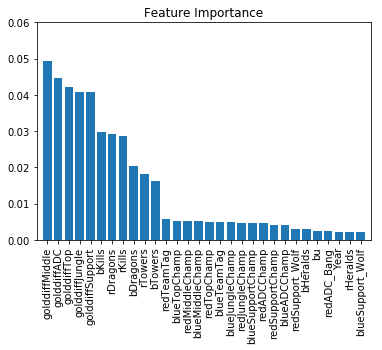

In [127]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns

forest = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,
                                max_features = 'log2',n_jobs=4,criterion='gini',random_state = 1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_



indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plot_number = 30    
plt.title('Feature Importance')
plt.bar(range(0,plot_number), 
        importances[indices[0:plot_number]],
        align='center')

plt.xticks(range(0,plot_number), 
           feat_labels[indices[0:plot_number]], rotation=90)
plt.xlim([-1, plot_number])
plt.ylim([0.00000,0.06])
plt.savefig('/random_forest_selection.png', dpi=300)
plt.show()

# Training Data with Different Models

In [33]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(penalty='l1',n_iter=100, eta0=1, random_state=1)
ppn.fit(X_train, y_train)

print('accuracy of trainning = ' ,ppn.score(X_train,y_train))
print('accuracy of testing = ' ,ppn.score(X_test,y_test))

accuracy of trainning =  0.841957255343
accuracy of testing =  0.65791776028


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',C=1,random_state=1)   
lr.fit(X_train, y_train)
print('accuracy of trainning = ' ,lr.score(X_train,y_train))
print('accuracy of testing = ' ,lr.score(X_test,y_test))

accuracy of trainning =  0.740907386577
accuracy of testing =  0.715223097113


<br>
<br>